# X-Ray Classifer Model 

We will build a classifier model to discern the difference between X-rays of chests that 
* Have bacterial pneumonia or viral pneumonia
* Are otherwise healthy
 

First we will import the libraries that we will require

In [59]:
import os
import random
import cv2
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

Next we can import the data (for the purpose of labeling our images, 0: healthy lungs, 1: pneumonia lungs)

In [17]:
train_normal_path = "chest_xray/train/NORMAL/"
train_pneumonia_path = "chest_xray/train/PNEUMONIA/"
test_normal_path = "chest_xray/test/NORMAL/"
test_pneumonia_path = "chest_xray/test/PNEUMONIA/"

training_data = []
testing_data = []

train_files_normal = os.listdir('chest_xray/train/NORMAL')
for file in train_files_normal:
    image = cv2.imread(os.path.join(train_normal_path, file))
    training_data.append((image, 0))

train_files_pneumonia = os.listdir('chest_xray/train/PNEUMONIA')
for file in train_files_pneumonia:
    image = cv2.imread(os.path.join(train_pneumonia_path, file))
    training_data.append((image, 1))

test_files_normal = os.listdir('chest_xray/test/NORMAL')
for file in test_files_normal:
    image = cv2.imread(os.path.join(test_normal_path, file))
    testing_data.append((image, 0))


test_files_pneumonia = os.listdir('chest_xray/test/PNEUMONIA')
for file in test_files_pneumonia:
    image = cv2.imread(os.path.join(test_pneumonia_path, file))
    testing_data.append((image, 1))

random.shuffle(training_data)
random.shuffle(testing_data)

In [18]:
training_data[0]

(array([[[  6,   6,   6],
         [  9,   9,   9],
         [ 11,  11,  11],
         ...,
         [106, 106, 106],
         [106, 106, 106],
         [101, 101, 101]],
 
        [[  6,   6,   6],
         [  8,   8,   8],
         [ 11,  11,  11],
         ...,
         [ 98,  98,  98],
         [100, 100, 100],
         [ 95,  95,  95]],
 
        [[  5,   5,   5],
         [  7,   7,   7],
         [  9,   9,   9],
         ...,
         [ 87,  87,  87],
         [ 88,  88,  88],
         [ 84,  84,  84]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [19]:
testing_data[0]

(array([[[122, 122, 122],
         [119, 119, 119],
         [115, 115, 115],
         ...,
         [ 63,  63,  63],
         [ 61,  61,  61],
         [ 59,  59,  59]],
 
        [[124, 124, 124],
         [121, 121, 121],
         [116, 116, 116],
         ...,
         [ 64,  64,  64],
         [ 62,  62,  62],
         [ 59,  59,  59]],
 
        [[126, 126, 126],
         [122, 122, 122],
         [118, 118, 118],
         ...,
         [ 65,  65,  65],
         [ 62,  62,  62],
         [ 60,  60,  60]],
 
        ...,
 
        [[  1,   1,   1],
         [ 23,  23,  23],
         [  2,   2,   2],
         ...,
         [  0,   0,   0],
         [  7,   7,   7],
         [  0,   0,   0]],
 
        [[  9,   9,   9],
         [ 25,  25,  25],
         [  9,   9,   9],
         ...,
         [  8,   8,   8],
         [  5,   5,   5],
         [  2,   2,   2]],
 
        [[ 12,  12,  12],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 17,  17,  17],
  

Let's see an example of a healthy xray and an un-healthy xray

Text(0.5, 1.0, 'healthy 3')

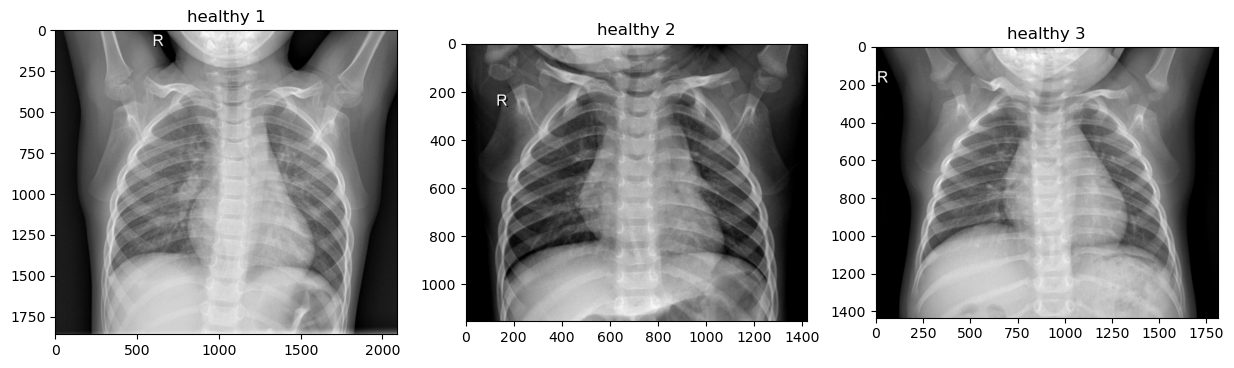

In [20]:
ex1 = img.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg")
ex2 = img.imread("chest_xray/train/NORMAL/IM-0117-0001.jpeg")
ex3 = img.imread("chest_xray/train/NORMAL/IM-0119-0001.jpeg")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ex1, cmap = 'gray')
axes[0].set_title('healthy 1')

axes[1].imshow(ex2, cmap = 'gray')
axes[1].set_title('healthy 2')

axes[2].imshow(ex3, cmap = 'gray')
axes[2].set_title('healthy 3')

Text(0.5, 1.0, 'pneumonia 3')

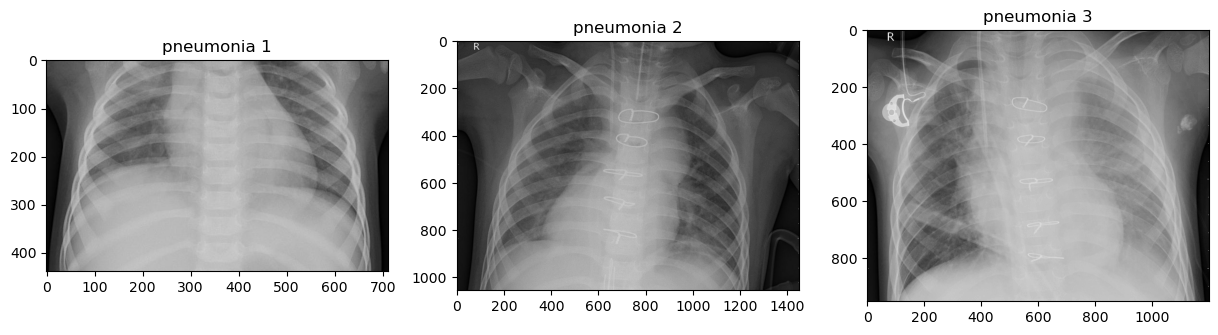

In [21]:
ex4 = img.imread("chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg")
ex5 = img.imread("chest_xray/train/PNEUMONIA/person2_bacteria_3.jpeg")
ex6 = img.imread("chest_xray/train/PNEUMONIA/person3_bacteria_11.jpeg")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ex4, cmap = 'gray')
axes[0].set_title('pneumonia 1')

axes[1].imshow(ex5, cmap = 'gray')
axes[1].set_title('pneumonia 2')

axes[2].imshow(ex6, cmap = 'gray')
axes[2].set_title('pneumonia 3')

Now that we have seen a few examples of each type of xray, lets begin preprocessing the data 

In [22]:
train_normal = len(os.listdir("chest_xray/train/NORMAL"))
train_pneumonia = len(os.listdir("chest_xray/train/PNEUMONIA"))
test_normal = len(os.listdir("chest_xray/test/NORMAL"))
test_pneumonia = len(os.listdir("chest_xray/test/PNEUMONIA"))

print("Number of healthy x-rays in training data: ", train_normal)
print("Number of un-healthy x-rays in training data: ", train_pneumonia)
print("Number of healthy x-rays in testing data: ", test_normal)
print("Number of un-healthy x-rays in testing data: ", test_pneumonia)

Number of healthy x-rays in training data:  1341
Number of un-healthy x-rays in training data:  3875
Number of healthy x-rays in testing data:  234
Number of un-healthy x-rays in testing data:  390


One important thing to notice is that there are much more x-rays of lungs with pneumonia than lungs without pneumonia
This could cause problems during model training, these are some popular remedies
* Make copies of healthy xrays with very slight modifications
* Take out some of the pneumonia x-rays
* (More complicated) use generative AI to make more healthy lung x-rays
* (More complicated) assign different weights between healthy and pneumonia x-rays during training

Another important thing to notice is that some of the images are different sizes, which would really confuse the model, so we are going to resize the images so they are all the same size

In [23]:
target_size = (600, 400)  # Replace with your desired size

resized_training = []
resized_testing = []

for image, label in training_data:
    resized_image = cv2.resize(image, target_size)
    resized_training.append((resized_image, label))

for image, label in testing_data:
    resized_image = cv2.resize(image, target_size)
    resized_testing.append((resized_image, label))

Text(0.5, 1.0, 'training 3')

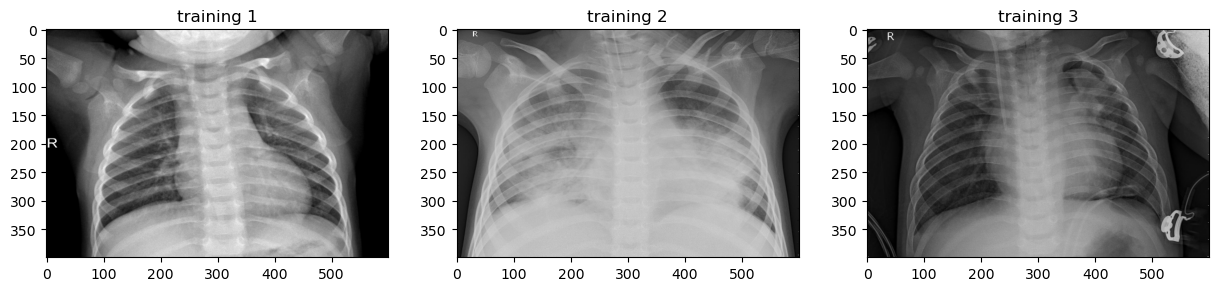

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(resized_training[0][0], cmap = 'gray')
axes[0].set_title('training 1')

axes[1].imshow(resized_training[1][0], cmap = 'gray')
axes[1].set_title('training 2')

axes[2].imshow(resized_training[2][0], cmap = 'gray')
axes[2].set_title('training 3')

In [25]:
print(resized_training[0][1])
print(resized_training[1][1])
print(resized_training[2][1])

0
1
1


In [26]:
training_images = []
training_labels = []

testing_images = []
testing_labels = []

for image, label in resized_training:
    training_images.append(image)
    training_labels.append(label)

for image, label in resized_testing:
    testing_images.append(image)
    testing_labels.append(label)
    
training_images = np.array(training_images)
training_labels = np.array(training_labels)
testing_images = np.array(testing_images)
testing_labels = np.array(testing_labels)

In [27]:
training_images[0]

array([[[ 7,  7,  7],
        [10, 10, 10],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [99, 99, 99]],

       [[ 6,  6,  6],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [74, 74, 74]],

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [28]:
training_labels[0]

0

Now that all of our images are grayscaled and the same size, we are ready to begin working with the model

In [29]:
# define model
model = models.Sequential()

#define input layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(400,600,3)))

#max pooling layer after convolutional layer
model.add(layers.MaxPooling2D((2,2)))

#another convolutional layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

#flatten info that results from all of these layers
model.add(layers.Flatten())

#2 dense layers
model.add(layers.Dense(64, activation='relu'))

#final output layer
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#I need to change this so the imgaes and labels are split up
model.fit(training_images, training_labels, epochs=4, validation_data=(testing_images, testing_labels))

Epoch 1/4
163/163 [==============================] - 234s 1s/step - loss: 149.1298 - accuracy: 0.8470 - val_loss: 0.5521 - val_accuracy: 0.8189
Epoch 2/4
163/163 [==============================] - 225s 1s/step - loss: 0.1848 - accuracy: 0.9293 - val_loss: 0.7773 - val_accuracy: 0.7308
Epoch 3/4
163/163 [==============================] - 232s 1s/step - loss: 0.1383 - accuracy: 0.9526 - val_loss: 1.6028 - val_accuracy: 0.7612
Epoch 4/4
163/163 [==============================] - 226s 1s/step - loss: 0.0784 - accuracy: 0.9743 - val_loss: 2.4509 - val_accuracy: 0.7372


Now that the model is done we can properly evaluate the model and see how good it did
There are many ways to do this. The simplest way is just observing the model's overall loss and accuracy

In [30]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
#loss: how off model is from ideal result
#accuracy: how many images did it correctly classify
print(f"Loss: {loss}, Accuracy: {accuracy}")

20/20 [==============================] - 7s 335ms/step - loss: 2.4509 - accuracy: 0.7372
Loss: 2.450885057449341, Accuracy: 0.7371794581413269


We can also use a confusion matrix to specifically see how many cases were properly/improperly calssified

20/20 [==============================] - 8s 354ms/step


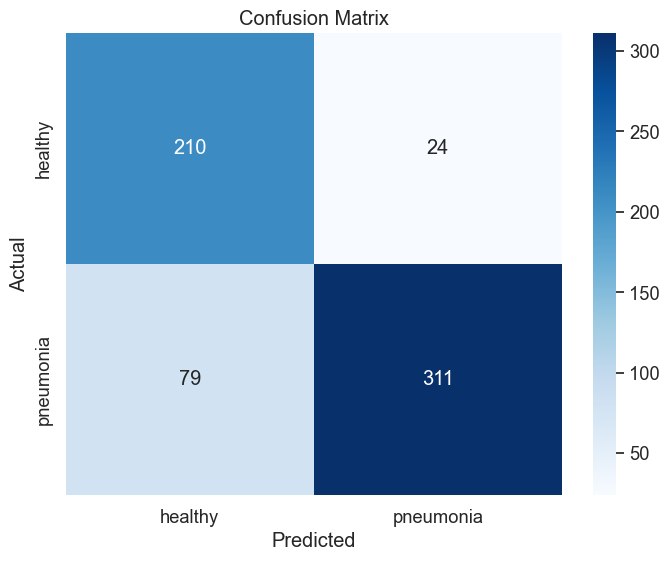

In [62]:
testing_predictions = model.predict(testing_images)

preds = []
for pred in testing_predictions:
    val = 0 if pred[1] < 1 else 1
    preds.append(val)

cm = confusion_matrix(testing_labels, preds)

class_labels = ['healthy', 'pneumonia']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Another way is by using the classification report

In [58]:
report = classification_report(testing_labels, preds)

print(report)

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       234
           1       0.93      0.80      0.86       390

    accuracy                           0.83       624
   macro avg       0.83      0.85      0.83       624
weighted avg       0.85      0.83      0.84       624


We can also save the model so that if we want to use it again we don't have to use all the time and resources to train it

In [31]:
model.save('x-ray-classifier.model')

INFO:tensorflow:Assets written to: x-ray-classifier.model/assets


INFO:tensorflow:Assets written to: x-ray-classifier.model/assets


Now if we ever want to load the model from the file its saved in we use the following line

In [ ]:
model = models.load_model('x-ray-classifier.model')